# Lesson 3 Assignment - Wine Classifier

## Author - Kenji Oman

### Instructions
Your task for this assignment:  Design a simple, low-cost sensor that can distinguish between red wine and white wine.
Your sensor must correctly distinguish between red and white wine for at least 95% of the samples in a set of 6497 test samples of red and white wine.

Your technology is capable of sensing the following wine attributes:
- Fixed acidity  -  Free sulphur dioxide
- Volatile acidity  -  Total sulphur dioxide
- Citric acid  -  Sulphates
- Residual sugar  -  pH
- Chlorides  - Alcohol
- Density




## Tasks
1. Read <a href="https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/WineQuality.pdf">WineQuality.pdf</a>.
2. Use the RedWhiteWine.csv or RedWhiteWine.arff that is provided.
Note: If needed, remove the quality attribute, which you will not need for this assignment.
3. Build an experiment using Naive Bayes Classifier.

Answer the following questions:
1. What is the percentage of correct classification results (using all attributes)?
2. What is the percentage of correct classification results (using a subset of the attributes)?
3. What is the AUC of your model?
4. What is the best AUC that you can achieve?
5. Which are the the minimum number of attributes? Why?


# NOTE:
I initially tried the typical data science workflow of looking at the data, cleaning/ prepping it, then running my model, but, based on a discussion with Kristin (Dr. Tolle), believe that perhaps the requirements were to just take the raw data as-is (no cleaning), and try to achieve an accuracy above 95%.  So, in cell 7, I tried keeping the un-modified data before cleaning.  I ran it in cells 15-17 after the cleaned data, but was still getting accuracies above 95%.  Not sure what else to do for this, so we will leave this assignment as-is, with the hopes that I've fulfilled what we need to do for this assignment (foucusing the later questions on just the uncleaned data)

In [1]:
# The URL wasn't working, so I pointed it to a cached version of the data I had downloaded
#URL = "https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/RedWhiteWine.csv"
URL = 'RedWhiteWine.csv'

In [2]:
# Import libraries/ setup library
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import pandas_profiling as pp

from scipy import interp
from sklearn.naive_bayes import GaussianNB
import sklearn.model_selection as ms
import sklearn.metrics as met

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Grab data
df = pd.read_csv(URL)

# and take a peak
display(Markdown('Look at the first 5 rows'))
display(df.head())
display(Markdown('Look for null entries/ column types'))
display(df.info())
display(Markdown('Look at summary statistics'))
df.describe(include='all')

Look at the first 5 rows

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Class  
0      9.4        5      1  
1      9.8        5      1  
2      9.8        5      1  
3      9.8        6      1  
4      9.4        5      1

Look for null entries/ column types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
Class                   6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 659.9 KB


None

Look at summary statistics

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality        Class  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378     0.246114  
std       0.160787     0.148806     1.192712     0.873255     0.430779  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.430000     9.500000     5.000000     0.000000  
50%       3.210000     0.510000    10.300000     6.000000     0.000000  
75%       3.320000     0.600000    11.300000     6.000000     0.000000  
max       4.010000     2.000000    14.900000     9.000000     1.000000

No missing data points!  Also, it looks like we actually have more features than the description given above (or on Canvas), and instead of an "R/W" column mentioned in WineQuality.pdf, we have Class (which likely identifies one of  the two of Red/White, but we are missing a description of what class = 0/1 actually means.

Let's now take a look at the profile report, to see what we can glean from that representation/ summary of the data.
# Pandas Profiler (next 4 sections)

In [4]:
# First, remove the spaces in the column names, since that makes it harder to access columns later
columns = df.columns
columns = [x.replace(' ', '_') for x in columns]
df.columns = columns

# Print a report
profile = pp.ProfileReport(df, bins=20)
profile

In the report, we see that "Class" truly is binary, but interestingly, there is an imbalance in the prevalence frequencies -- 0 appears at 75.4% of the time, with 1 only appearing at 24.6% of the time.  Also, looking at all the distributions, it looks like all the features have quite a bit of positive skew (some more extreme than others).  Let's take a look at this directly.

total_sulfur_dioxide   -0.001177
quality                 0.189623
pH                      0.386839
citric_acid             0.471731
density                 0.503602
alcohol                 0.565718
Class                   1.179095
free_sulfur_dioxide     1.220066
residual_sugar          1.435404
volatile_acidity        1.495097
fixed_acidity           1.723290
sulphates               1.797270
chlorides               5.399828
dtype: float64

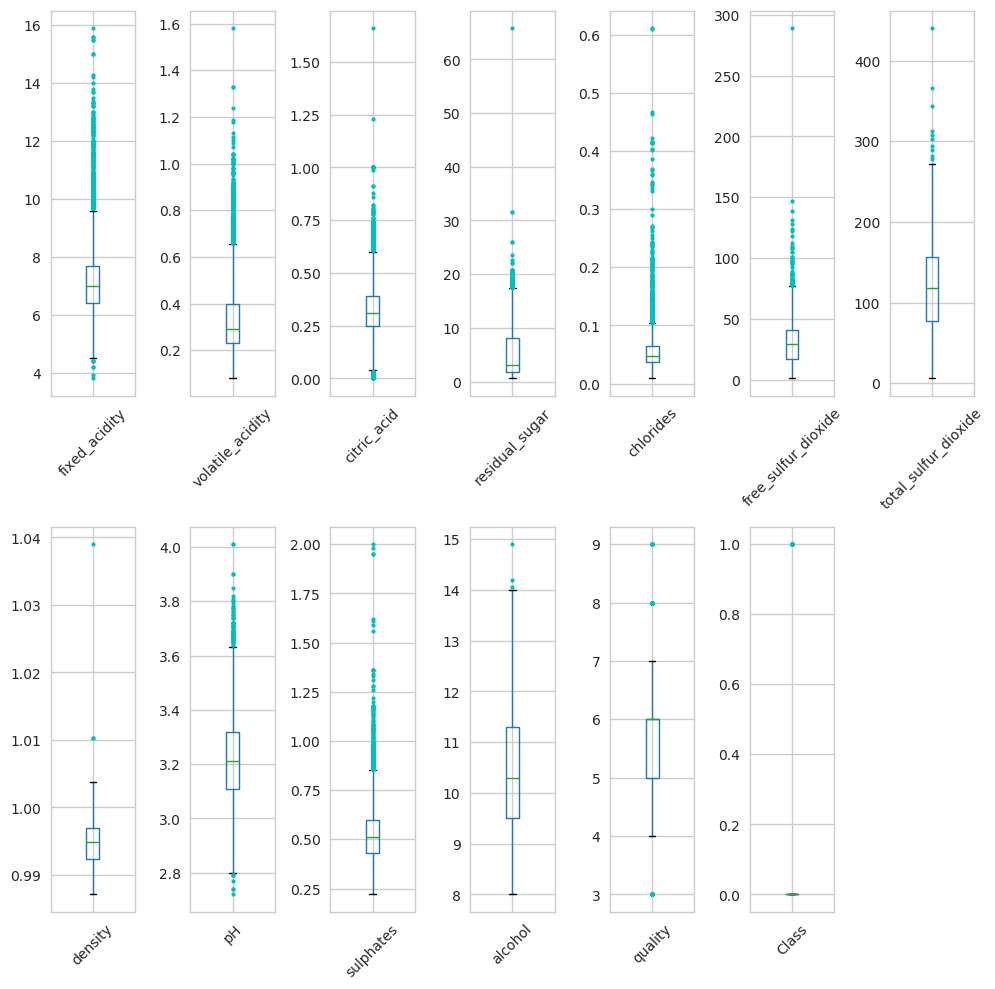

In [5]:
# Take a look at the skew values of  the data.
display(df.skew().sort_values())

# And, to easily visualize it, let's make boxplots
sns.set_style('whitegrid') # Since the profiler reset the colorscheme
axes = df.plot(subplots=True, kind='box', figsize=(10,10), rot=45, layout=(2,7), sym='c.')
plt.tight_layout()
plt.show()

True enough, total sulfer dioxide was the only feature with negative skew, with chlorides being skewed the most for the remaining features.  Also, there seems to be one datapoint that is well above and beyond all the others (even for those classified as "outlier" by the boxplots).  Let's take a look at a scattermatrix to see if this might be the same datapoint.  We can also look at the scatterplots to see the shape of the distributions with respect to other variables, but we may have to perform some transformations to some of these columns (although, I think Naive Bayes may not be as sensitive to the exact shape of the underlying feature distributions??, as compared to, say, linear regression).

# ScatterMatrix

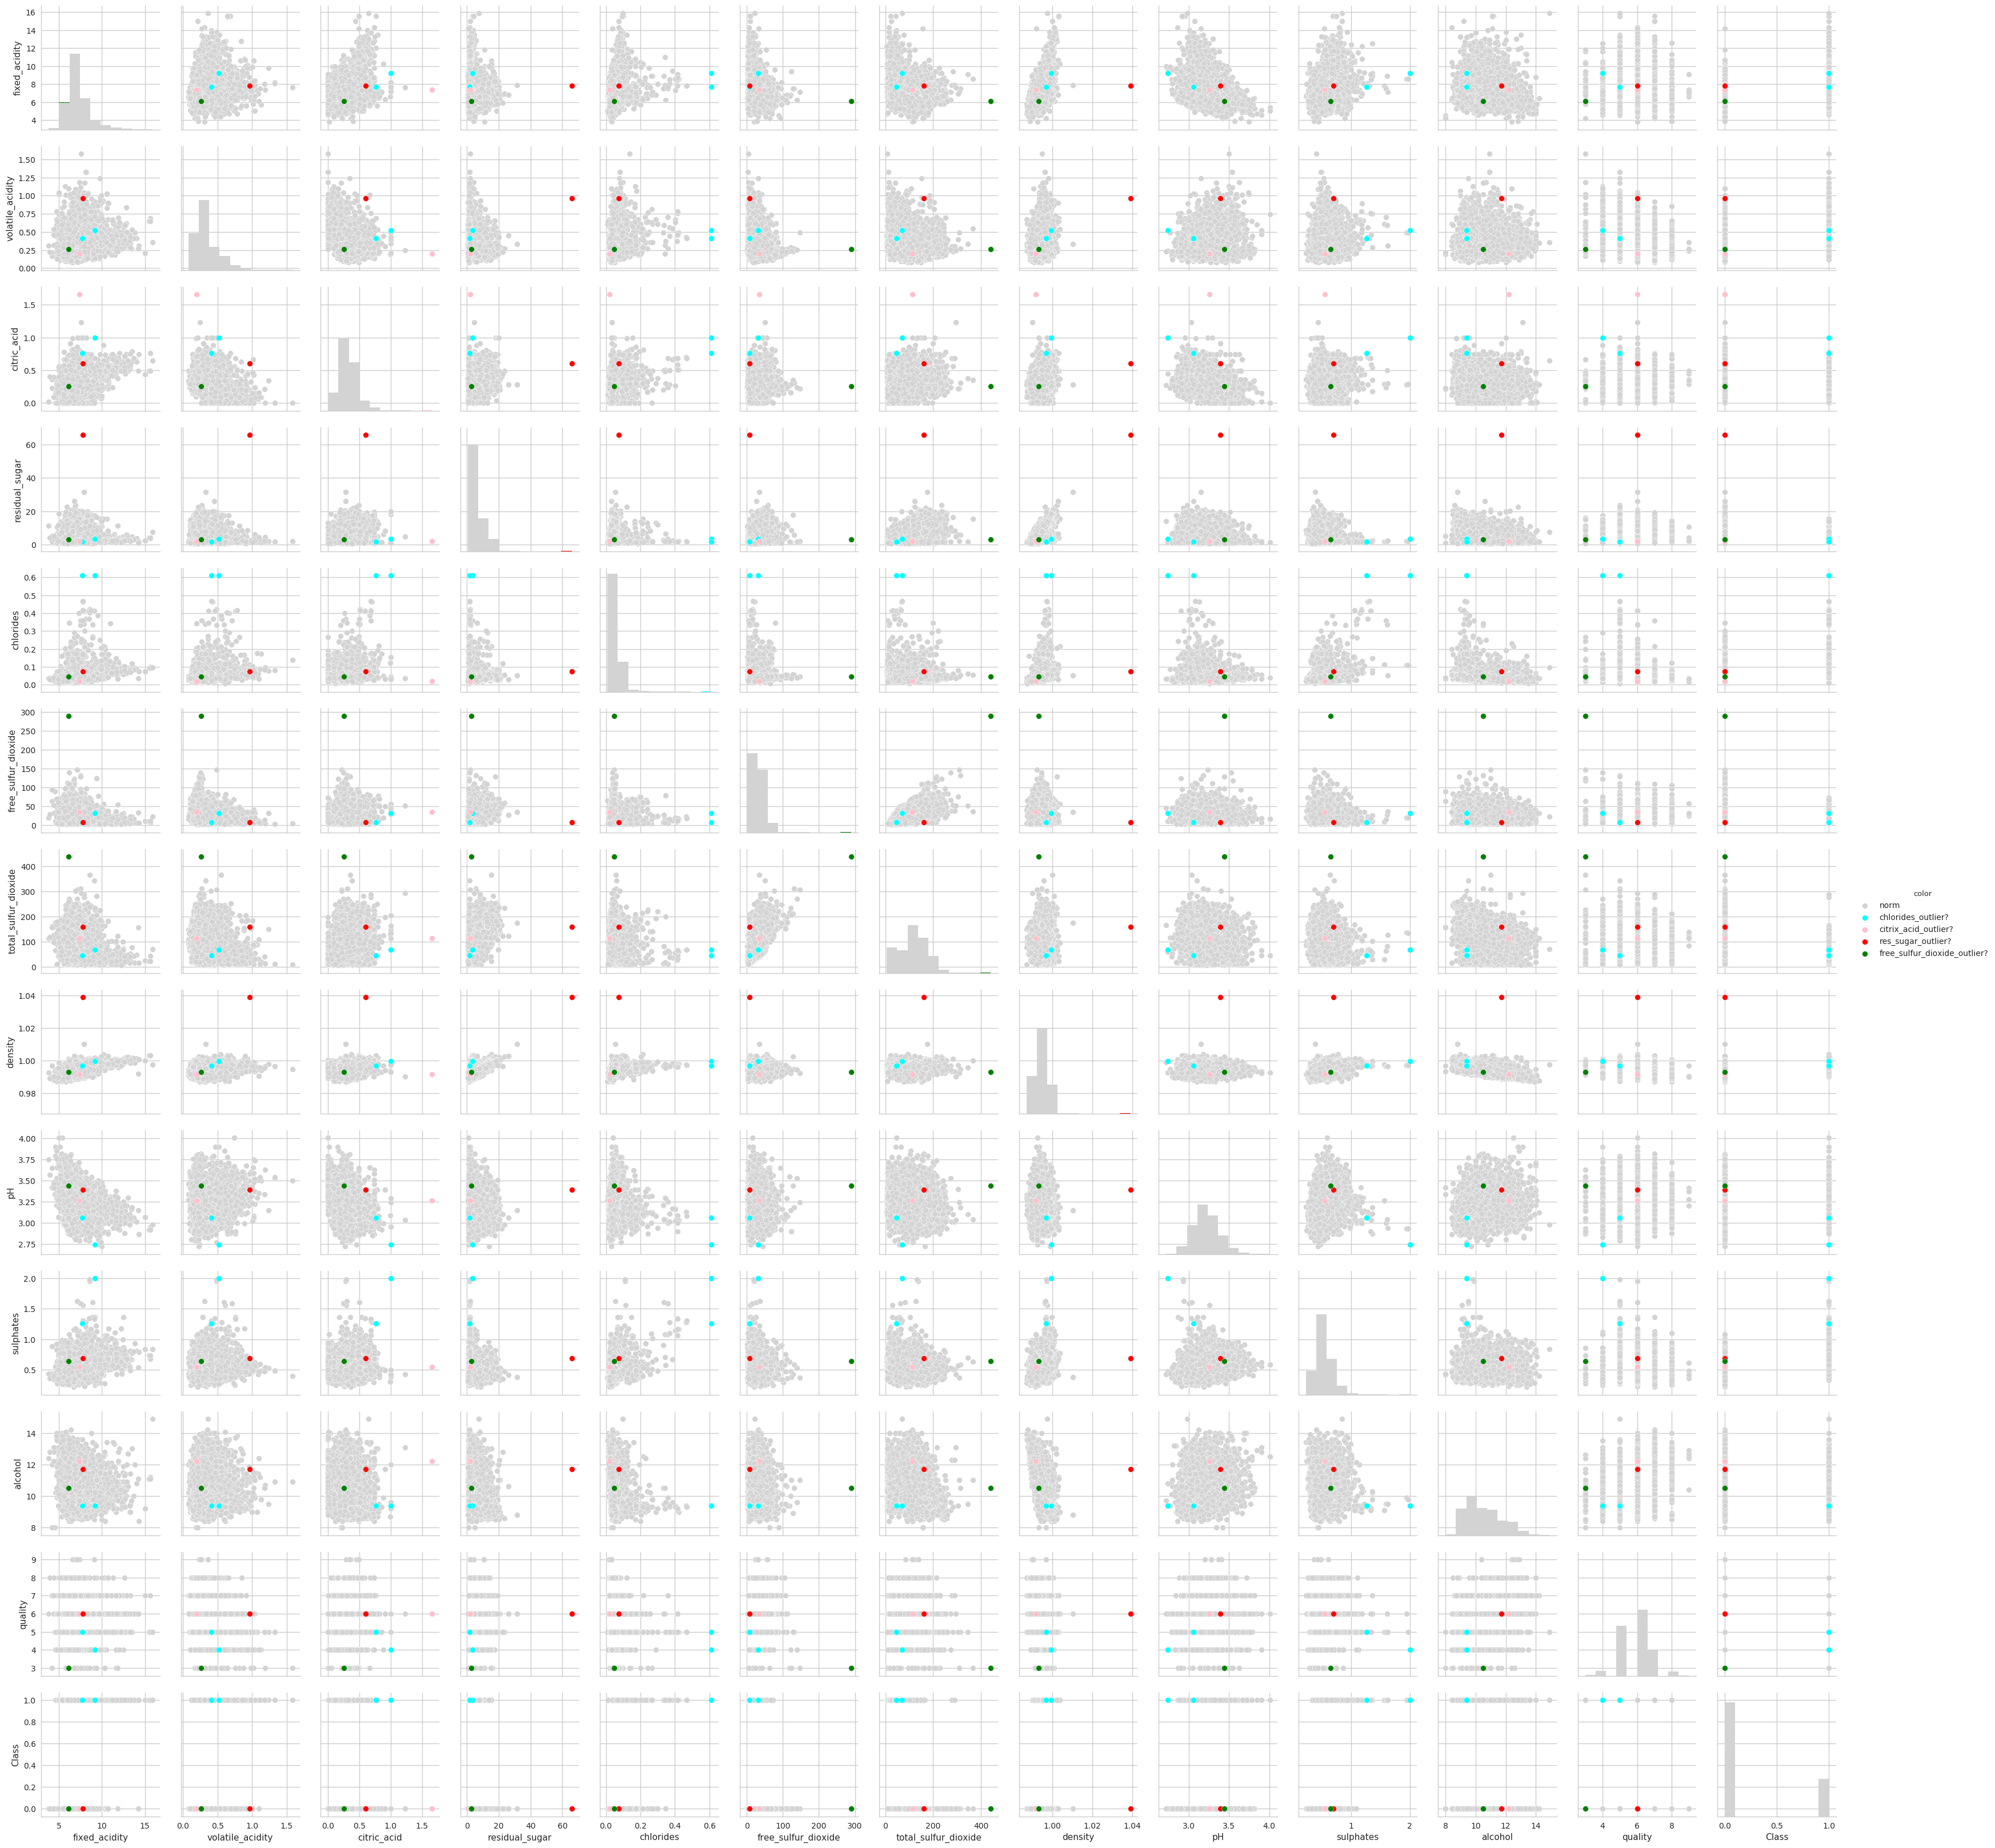

In [6]:
# Make a scattermatrix to look at the outlier points/ see nonlinear relationships
temp = df.copy()
temp.loc[temp.residual_sugar > 40, 'color'] = 'res_sugar_outlier?'
temp.loc[(temp.free_sulfur_dioxide > 200) & temp.color.isna(), 'color'] = 'free_sulfur_dioxide_outlier?'
temp.loc[(temp.chlorides > 0.5) & temp.color.isna(), 'color'] = 'chlorides_outlier?'
temp.loc[(temp.citric_acid > 1.25) & temp.color.isna(), 'color'] = 'citrix_acid_outlier?'
temp = temp.fillna('norm')
sns.pairplot(data=temp, hue='color', #hue_order=['norm', 'res_sugar_outlier?', 'free_sulfur_dioxide_outlier?', 'chlorides_outlier?'],
             palette={'norm': 'lightgrey', 'res_sugar_outlier?': 'red', 'free_sulfur_dioxide_outlier?': 'green', 'chlorides_outlier?': 'cyan',
                      'citrix_acid_outlier?': 'pink'})
plt.show()

It does look like there are potential outliers in residual sugar, free sulfer dioxide, and density, with maybe a few additional outliers in chlorides and sulphates.  But, we also see that these observations are not necessarily outliers in other columns, so let's not completely remove them, but instead, set them to the next highest values for their columns.

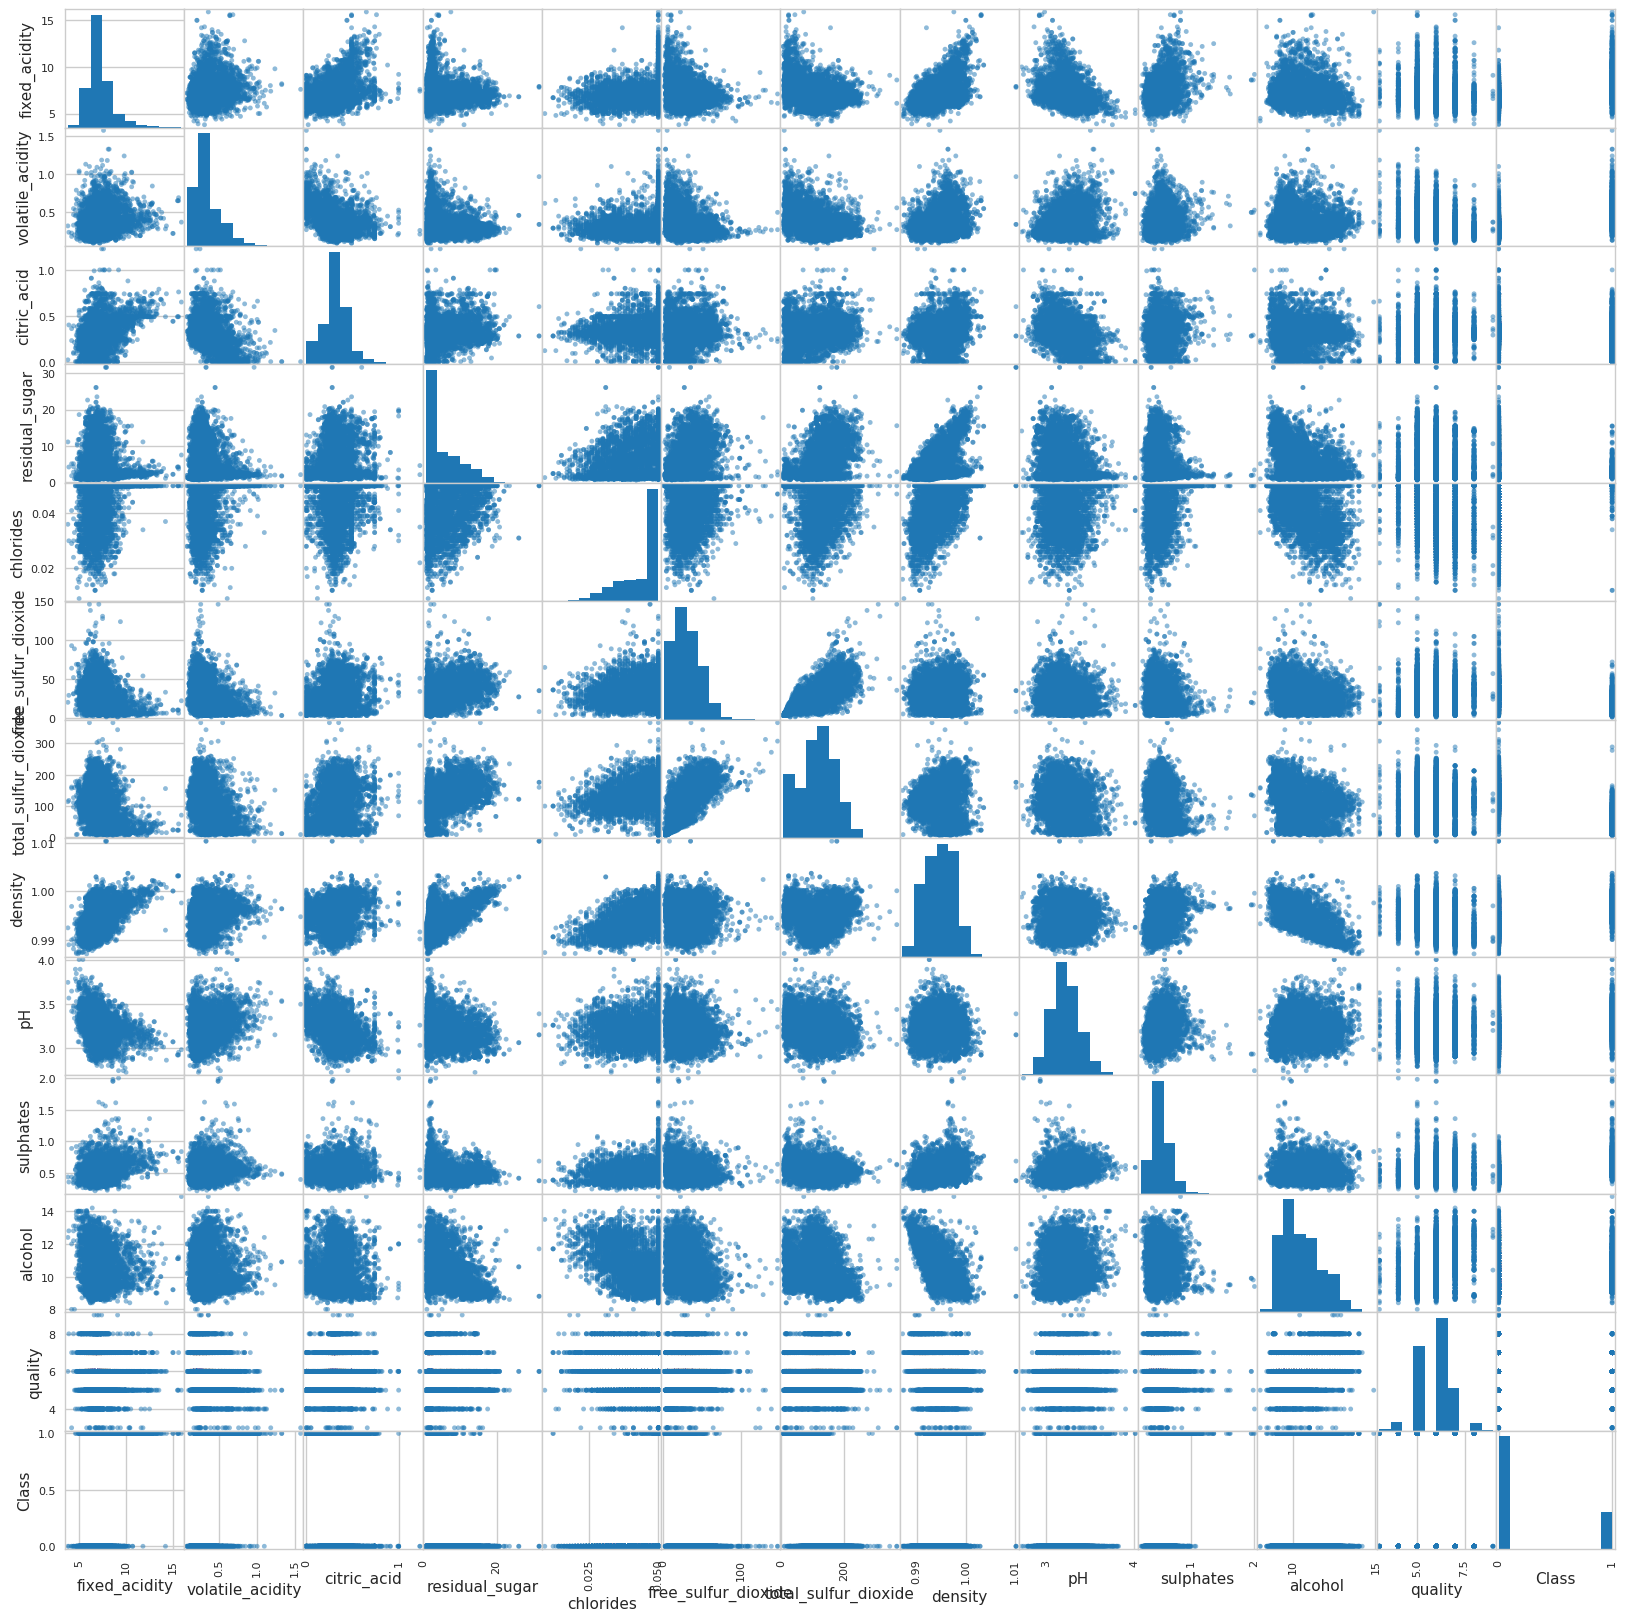

In [7]:
# Before we make adjustments, let's keep our "dirty" data for future use
dirty_df = df.copy(deep=True)

# Handle "outliers"
df.loc[df.residual_sugar > 40, 'residual_sugar'] = df.loc[df.residual_sugar <= 40, 'residual_sugar'].max()
df.loc[df.free_sulfur_dioxide > 200, 'free_sulfur_dioxide'] = df.loc[df.free_sulfur_dioxide <= 200, 'free_sulfur_dioxide'].max()
df.loc[df.total_sulfur_dioxide > 400, 'total_sulfur_dioxide'] = df.loc[df.total_sulfur_dioxide <= 400, 'total_sulfur_dioxide'].max()
df.loc[df.density > 1.02, 'density'] = df.loc[df.density <= 1.02, 'density'].max()
df.loc[df.chlorides > 0.05, 'chlorides'] = df.loc[df.chlorides <= 0.05, 'chlorides'].max()
df.loc[df.citric_acid > 1.25, 'citric_acid'] = df.loc[df.citric_acid <= 1.25, 'citric_acid'].max()

# And make another scattermatrix
pd.plotting.scatter_matrix(df, figsize=(20,20))
plt.show()

Overall, things look a lot better!  Now, let's look at how these features are correlated with each other (I like my clustered correlation plot better than from the pandas profilier report, so we'll generate it here).

# Correlation Plots

## Pearson Correlation Clustering

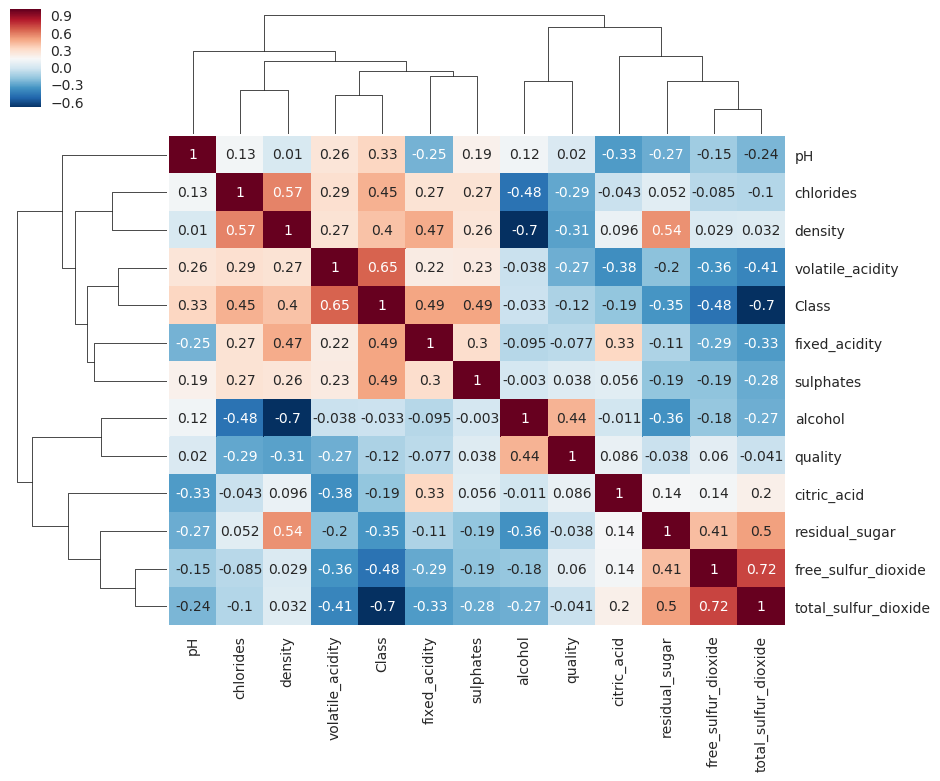

## Absolute Value of Pearson Correlation Clustering

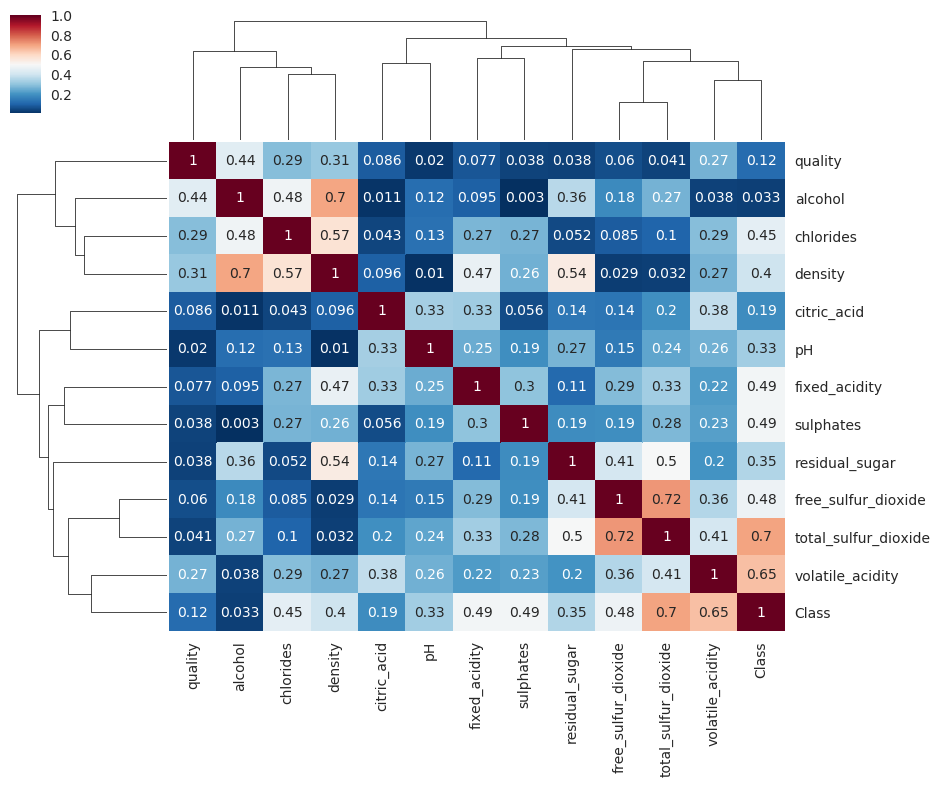

## Absolute Value of Spearman Correlation Clustering

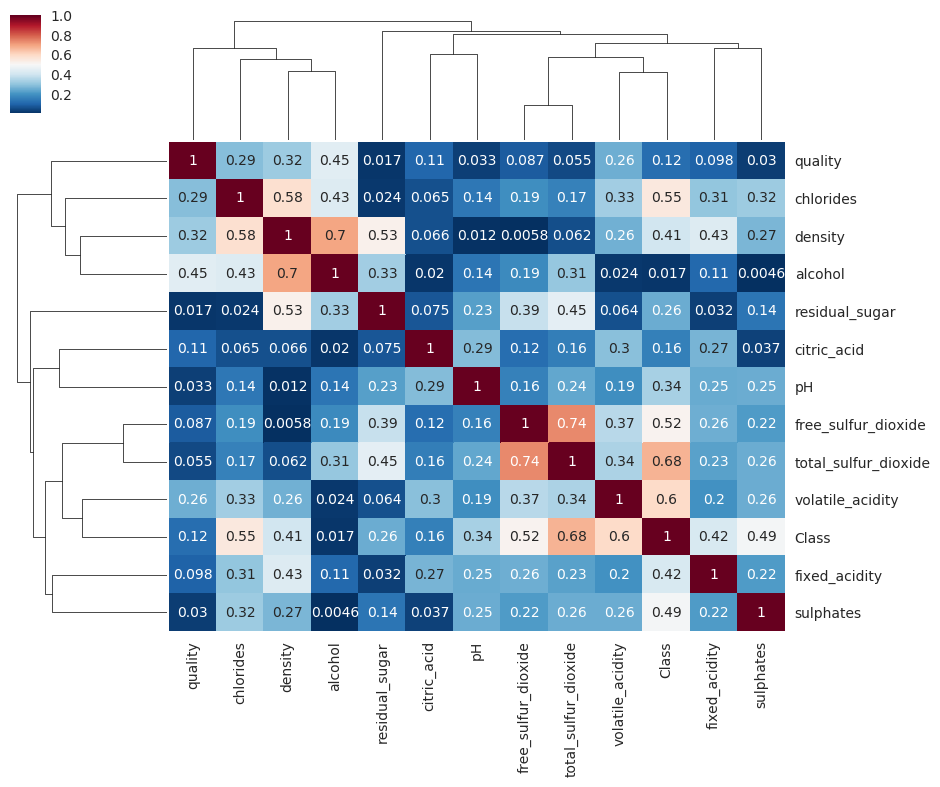

In [8]:
# See how the features correlate with each other.
display(Markdown('## Pearson Correlation Clustering'))
sns.clustermap(df.corr(), annot=True, cmap='RdBu_r', figsize=(10, 8))
plt.show()

# And, with the absolute value of the correlations (so we don't care about the direction of correlation,
# just the magnitude)
display(Markdown('## Absolute Value of Pearson Correlation Clustering'))
sns.clustermap(df.corr().abs(), annot=True, cmap='RdBu_r', figsize=(10, 8))
plt.show()

# And let's also do the same absolute value of Spearman's Correlation
display(Markdown('## Absolute Value of Spearman Correlation Clustering'))
sns.clustermap(df.corr(method='spearman').abs(), annot=True, cmap='RdBu_r', figsize=(10, 8))
plt.show()

To describe what we have above, I have a correlation heatmap where features are clustered based on the pattern of how similarly they are correlated to other features.  I like the latter two plots (taking the absolute value of the correlation) better since then we cluster strictly based on the strength of the correlation, not the direction (don't care if it is positively or negatively correlated).

From the above, we see that **Class** seemes to be most strongly correlated to **total sulfer dioxide**, but it is consistently being clustered with **volatile acidity** (so, even though the two variables aren't as strongly correlated with each other, **volatile acidity** is the best candidate to serve as a proxy to **Class**, if we were to need one).  Other than that (looking at the pearson's correlation plots, primarily off of the absolute value one), we see that **free/total sulfer dioxide** are next most similar to **Class** in terms of their pattern of correlations with the other variables, but they are most strongly related to each other as well (so we probably only would need one of them, as the other would contain redundant information).  Next we have **residual sugar**, **fixed acidity**, and **sulphates** -- although **residual sugar** is clustered closer to **Class**, **fixed acidity** and **sulphates** are actually more directly correlated with it, to about the same degree.  So, perhaps we only really need one of them to capture more or less the information they contain (and probably go with **fixed acidity** or **sulphates**, as they are more highly correlated with **Class**.

---

Continuing in this pattern, I would probably recommend to use (just off of these patterns of correlation clustering), ordered by strength of correlation with Class:

1. Total Sulfer Dioxide -- it is the most highly correlated with Class, even if it a little further out in the clustering based on relationships with other variables.
2. Volatile Acidity -- also highly correlated with Class, and shares a similar relationship of Class with other variables
3. Fixed Acidity -- of these next three features, this is the most correlated with Class (tied with sulphates), and (based on the scater plots) seems to be the most "linear" with the other features (the correlations are a little tighter, which can also be seen in the correlation matrix).
4. pH -- more correlated to class than citric acid, but is from the same group in the clustering.
5. After that, perhaps keep density.  Although it is not quite as highly correlated with Class as chlorides, it has higher correlation values with the remaining features than chlorides (so preserves more of the information they contain).

As an interesting side note, wine quality is apparently most strongly correlated with alcohol content (positively as well, so the more alcohol a wine has, the higher the quality it was judged to be).

---
Now, for the sake of time, let's try fitting some models/ checking accuracy measures.  Also, _**the instructions above said to remove quality as a feature**_, so will do that.

# Run Model/ Get Accuracy Measures

In [9]:
# First, remove quality as a feature, as per the instructions
df.drop(columns='quality', inplace=True, errors='ignore')

# And, specify our trimmed features, by our correlation clusterings
cc_trimmed = 'total_sulfur_dioxide volatile_acidity fixed_acidity pH density'.split()

In [10]:
# Make function to keep from repeating what I have to type
def run_calculations(X, y):
    clf = GaussianNB()
    kfold = ms.StratifiedKFold(n_splits=5, random_state=10)
    scores = ms.cross_val_score(clf, X, y, cv=kfold, n_jobs=-1, scoring='accuracy')

    # Also, grab the prediction probabilities
    clf = clf.fit(X, y)
    prob = clf.predict_proba(X)
    fpr, tpr, threshold = met.roc_curve(y, prob[:,1], pos_label=1)

    ########################
    # This last part of the function gives a "good" value for
    # the probability threshold based on finding the max of 
    # sensitivity + specificity, but found this can actually give a lower
    # accuracy measure than the default threshold (likely at 0.5).  Although
    # I could try to fix this to scan over thresholds to report on the best
    # accuracy, for the sake of time, let's just cut this section out.
    ########################
#     # Now, try to find the best threshold, based on maximizing accuracy
#     metrics = pd.DataFrame({
#         'sensitivity': tpr,
#         'specificity': 1 - fpr,
#         'threshold': threshold
#     })
    
#     # Now, find the optimum threshold
#     optimum = metrics.loc[(metrics.sensitivity + metrics.specificity).idxmax()]
    optimum = None
    
    # Return the scores from k-fold cross validation, the probability predictions, and the optimum threshold series
    return scores, prob, optimum

In [11]:
# Now, try running Naive Bayes without any feature selection
no_trim_scores, no_trim_prob, no_trim_opt = run_calculations(df.drop(columns='Class'), df.Class)
print('All Features Accuracy, Mean: {:.2f}%, Std: {:.2f}%'.format(no_trim_scores.mean() * 100, no_trim_scores.std() * 100))
#no_trim_accuracy = met.accuracy_score(df.Class, (no_trim_prob[:,1] >= no_trim_opt.threshold).astype(int))
#print('All Features Best Possible Accuracy: {:.2f}%'.format(no_trim_accuracy * 100))

All Features Accuracy, Mean: 97.66%, Std: 0.78%


In [12]:
# Now, try running Naive Bayes with our trimmed features
trim_scores, trim_prob, trim_opt = run_calculations(df[cc_trimmed], df.Class)
print('Trimmed Features Accuracy, Mean: {:.2f}%, Std: {:.2f}%'.format(trim_scores.mean() * 100, trim_scores.std() * 100))
#trim_accuracy = met.accuracy_score(df.Class, (trim_prob[:,1] >= trim_opt.threshold).astype(int))
#print('Trimmed Features Best Possible Accuracy: {:.2f}%'.format(trim_accuracy * 100))

Trimmed Features Accuracy, Mean: 97.23%, Std: 0.67%


In [13]:
# Now, try running Naive Bayes with just the most correlated feature
one_scores, one_prob, one_opt = run_calculations(df.total_sulfur_dioxide.values.reshape(-1,1), df.Class)
print('One Features Accuracy, Mean: {:.2f}%, Std: {:.2f}%'.format(one_scores.mean() * 100, one_scores.std() * 100))
#one_accuracy = met.accuracy_score(df.Class, (one_prob[:,1] >= one_opt.threshold).astype(int))
#print('One Features Best Possible Accuracy: {:.2f}%'.format(one_accuracy * 100))

One Features Accuracy, Mean: 92.20%, Std: 1.09%


In [14]:
# Try with two features
two_scores, two_prob, two_opt = run_calculations(df[['total_sulfur_dioxide', 'volatile_acidity']], df.Class)
print('Two Features Accuracy, Mean: {:.2f}%, Std: {:.2f}%'.format(two_scores.mean() * 100, two_scores.std() * 100))
#two_accuracy = met.accuracy_score(df.Class, (two_prob[:,1] >= two_opt.threshold).astype(int))
#print('Two Features Best Possible Accuracy: {:.2f}%'.format(two_accuracy * 100))

Two Features Accuracy, Mean: 95.31%, Std: 0.52%


In [15]:
# Now, try running Naive Bayes with our "dirty" data
clf = GaussianNB()
kfold = ms.StratifiedKFold(n_splits=5, random_state=10)
dirty_scores = ms.cross_val_score(clf, dirty_df[cc_trimmed], dirty_df.Class, cv=kfold, n_jobs=-1, scoring='accuracy')
print('All Features Accuracy on Dirty, Mean: {:.2f}%, Std: {:.2f}%'.format(dirty_scores.mean() * 100, dirty_scores.std() * 100))

All Features Accuracy on Dirty, Mean: 97.24%, Std: 0.73%


In [16]:
# And with one/ two features
one_dirty_scores = ms.cross_val_score(clf, dirty_df.total_sulfur_dioxide.values.reshape(-1,1), dirty_df.Class, cv=kfold, n_jobs=-1, scoring='accuracy')
print('One Features Accuracy on Dirty, Mean: {:.2f}%, Std: {:.2f}%'.format(one_dirty_scores.mean() * 100, one_dirty_scores.std() * 100))
two_dirty_scores = ms.cross_val_score(clf, dirty_df[['total_sulfur_dioxide', 'volatile_acidity']], dirty_df.Class, cv=kfold, n_jobs=-1, scoring='accuracy')
print('Two Features Accuracy on Dirty, Mean: {:.2f}%, Std: {:.2f}%'.format(two_dirty_scores.mean() * 100, two_dirty_scores.std() * 100))

One Features Accuracy on Dirty, Mean: 92.20%, Std: 1.09%
Two Features Accuracy on Dirty, Mean: 95.31%, Std: 0.52%


In [17]:
# Systematic search across features to see if we can get a better accuracy with just one feature
mean_results = {}
std_results = {}
for col in dirty_df.drop(columns=['Class']).columns:
    temp_score = ms.cross_val_score(clf, dirty_df[col].values.reshape(-1,1), dirty_df.Class, cv=kfold, n_jobs=-1, scoring='accuracy')
    mean_results[col] = temp_score.mean() * 100
    std_results[col] = temp_score.std() * 100
    
mean_results = pd.Series(mean_results)
std_results = pd.Series(std_results)
results = pd.concat([mean_results.reset_index().rename(columns={'index': 'feature', 0: 'accuracy_mean'}),
                     std_results.reset_index().rename(columns={'index': 'std_feature', 0: 'accuracy_std'})], axis=1).drop(columns='std_feature')
results.sort_values('accuracy_mean', ascending=False)

feature  accuracy_mean  accuracy_std
6   total_sulfur_dioxide      92.196528      1.085569
1       volatile_acidity      86.840514      2.205042
5    free_sulfur_dioxide      81.452912      0.715672
0          fixed_acidity      81.159502      2.516711
4              chlorides      80.605289      2.364084
2            citric_acid      79.145101      2.301087
9              sulphates      78.605301      1.961671
8                     pH      75.559029      2.185890
10               alcohol      75.388648      0.019014
11               quality      75.388648      0.019014
7                density      72.355687      1.783489
3         residual_sugar      66.939224      2.607155

## Summary
Answering some of the questions
1. What is the percentage of correct classification results (using all attributes)?
 1. With the cleaned data, I get an accuracy of 97.66%
 2. With the dirty data, I get an accuracy of 97.24%

2. What is the percentage of correct classification results (using a subset of the attributes)?
 1. With just one feature on the clean data, we can get an accuracy of 92.2%
 2. With the dirty data, we similarly get a max accuracy on one feature (the same, total_sulfer_dioxiode) of 92.2% (the cleaning didn't really affect our model's accuracy at all).
 3. With 2 features, we can achieve our desired 95% (95.2%, to be more precise) accuracy, irrespective of if the data has been cleaned or not

5) Which are the the minimum number of attributes? Why?
 1. We see that two features are sufficient to achieve the desired 95% accuracy.  This is likely because the two features I chose (total sulfer dioxide and volatile acidity) are the two most highly correlated with our target (Class), with  pearson correlation values of -0.7 and 0.65 respectively.  I chose these features not only for how highly correlated they are with Class, however, but also because they were clustered close to Class in the correlation clustering.

# AUC Calculations
Now, let's take a look at the AUC for our model.  For fun, I grabbed and tweaked a function from [sklearn's website](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html) that calculates the ROC and AUC per round of cross-validation.

In [18]:
# Based off of, http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html,
# define a function to do cross-validation with calculating of ROC curves/ AUC
def run_cv(X, y, n_splits=5, random_state=10):
    # Run classifier with cross-validation and plot ROC curves
    cv = ms.StratifiedKFold(n_splits=n_splits, random_state=random_state)
    classifier = GaussianNB()

    scores = []
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    f = plt.figure(figsize=(10,10))
    ax = f.add_subplot(111)
    
    i = 0
    for train, test in cv.split(X, y):
        
        # To allow pd.DataFrame or np.array, need
        # to check our object type and grab the relevant
        # data
        if isinstance(X, (np.ndarray, )):
            train_X = X[train]
            train_y = y[train]
            test_X = X[test]
            test_y = y[test]
        else:
            train_X = X.iloc[train]
            train_y = y.iloc[train]
            test_X = X.iloc[test]
            test_y = y.iloc[test]
        
        # Fit thet data for this run
        classifier = classifier.fit(train_X, train_y)
        
        # Get the mean accuracy score
        scores.append(classifier.score(test_X, test_y))
        
        # Get predicted probabilities
        probas_ = classifier.predict_proba(test_X)
        
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = met.roc_curve(test_y, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = met.auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = met.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print('Accuracy Mean: {:.2f}%, Std: {:.2f}%'.format(np.mean(scores)*100, np.std(scores)*100))

## All Features, Dirty Data

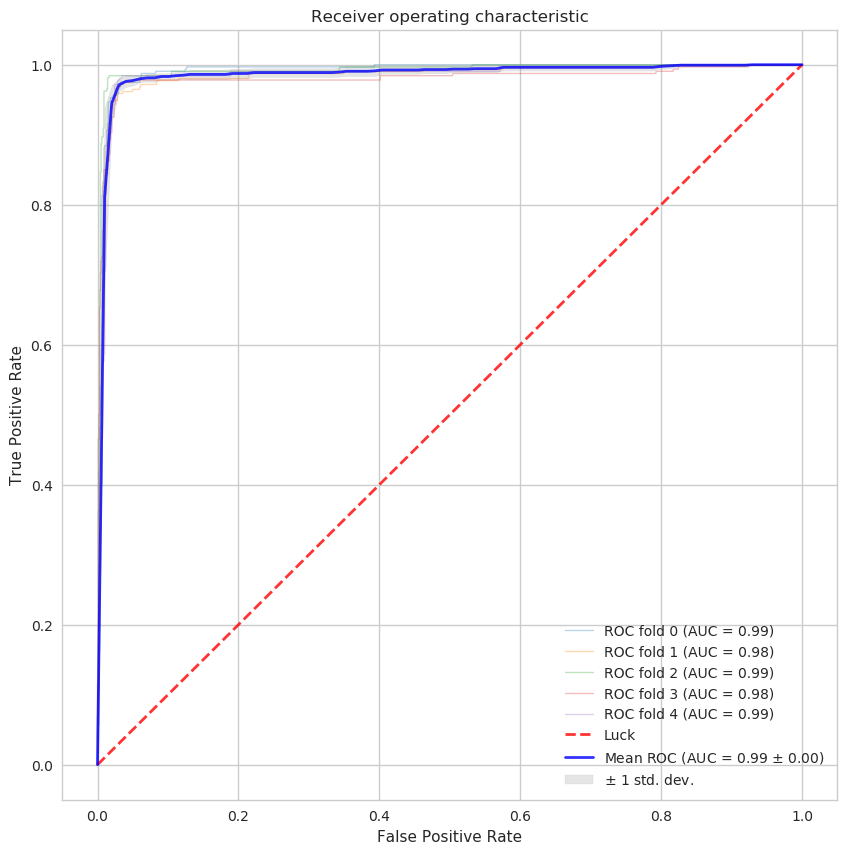

Accuracy Mean: 96.91%, Std: 0.84%


In [19]:
# Using all features to calculate AUC
display(Markdown('## All Features, Dirty Data'))
run_cv(dirty_df.drop(columns='Class'), dirty_df.Class)

## One Feature, Dirty Data

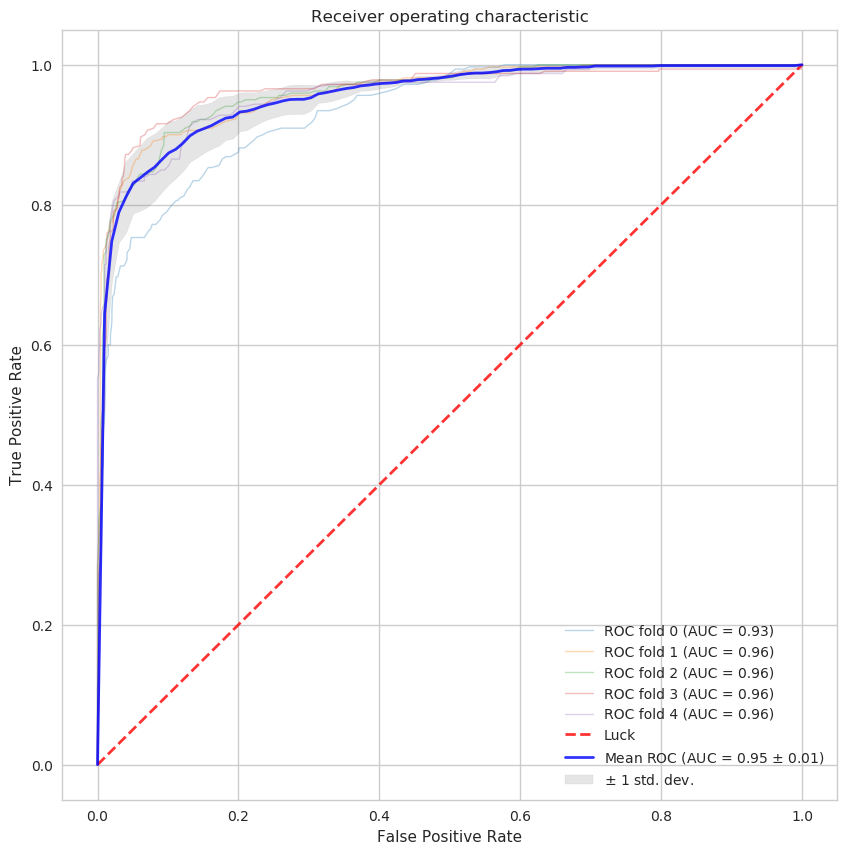

Accuracy Mean: 92.20%, Std: 1.09%


In [20]:
# Using one feature to calculate AUC
display(Markdown('## One Feature, Dirty Data'))
run_cv(dirty_df.total_sulfur_dioxide.values.reshape(-1,1), dirty_df.Class)

## Two Feature, Dirty Data

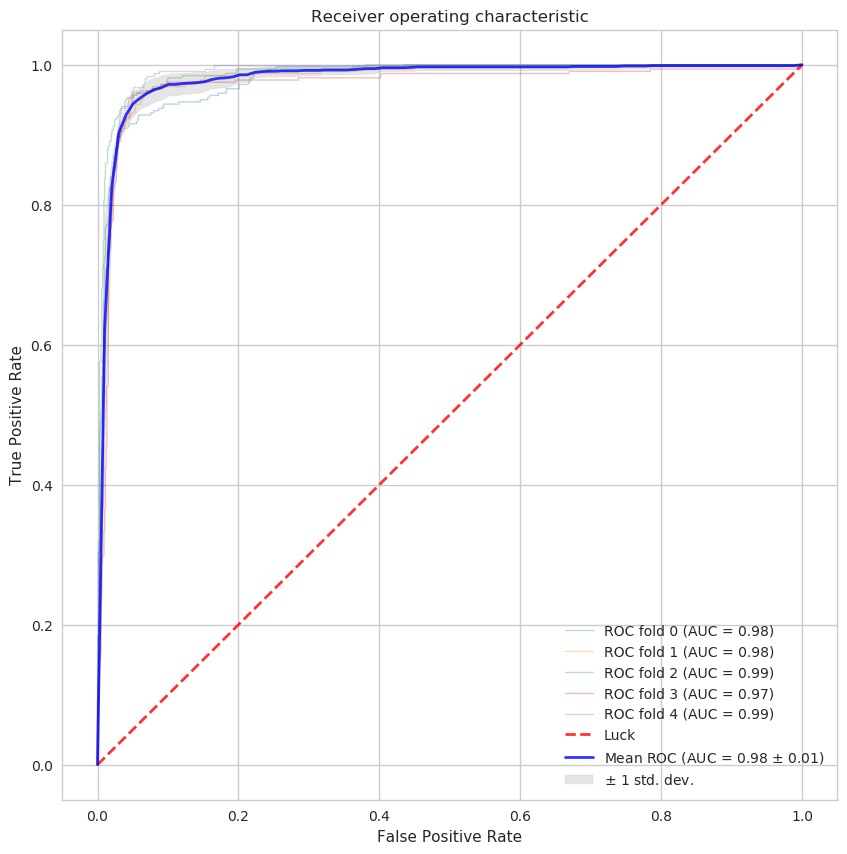

Accuracy Mean: 95.31%, Std: 0.52%


In [21]:
# Using two features to calculate AUC
display(Markdown('## Two Feature, Dirty Data'))
run_cv(dirty_df[['total_sulfur_dioxide', 'volatile_acidity']], dirty_df.Class)

## Summary
3) What is the AUC of your model?
 1. With all features using uncleaned data, we get an AUC of 0.99  I believe this is the best that we can do (answering next question)
 2. With just one feature on the uncleaned data, we get an AUC of 0.95
 3. With two features on the uncleaned data, we get an AUC of 0.98
 
4) What is the best AUC that you can achieve?

As I mentioned above in 3.1, I believe the best AUC we can achieve is 0.99